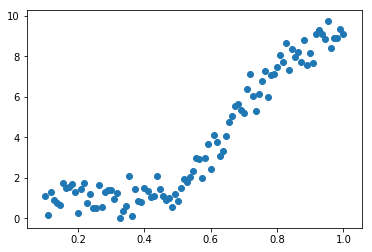

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x, 2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)
plt.scatter(data_x,data_y)
plt.show()


In [2]:
data_x = np.hstack((np.ones_like(data_x), data_x))
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x [order[:portion]]
test_y = data_y [order[:portion]]
train_x = data_x [order[portion:]]
train_y = data_y [order[portion:]]

(100, array([ 2.50397828,  2.2881596 ,  3.87650063,  4.33876298,  0.08685595,
        1.46227858,  0.10122169,  1.9164974 ,  0.31342298,  0.43579799,
        4.07333038,  0.03776979,  2.26160848,  0.00668697,  2.81138523,
        3.43576695,  0.01569251,  0.16761754,  2.54420072,  3.84303186,
        3.39447784,  0.26322592,  3.08019968,  2.46037004,  0.06417363,
        0.12020535,  0.1171606 ,  1.12192093,  0.03669213,  0.8983192 ,
        1.37009406,  0.41489241,  3.91439122,  0.00821078,  1.74471467,
        1.31654874,  0.12018476,  0.17322713,  0.52258741,  0.24433231,
        0.00701535,  2.81305479,  1.40834241,  1.51812947,  1.6113226 ,
        2.47412177,  0.01601132,  1.17271204,  0.90174725,  1.93569456,
        0.30868328,  3.84672029,  0.52410458,  6.40824528,  1.37639793,
        3.92072595,  0.69801856,  0.10175907,  1.58270709,  0.77863343,
        0.39765532,  3.15939015,  2.48755362,  0.92557098,  0.95071927,
        5.68378888,  3.9242994 ,  2.05812959,  3.04359971,

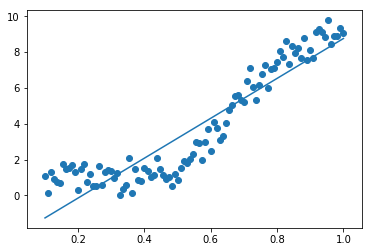

In [6]:
def get_gradient(w, x, y):
   y_estimate = x.dot(w).flatten()
   error = (y.flatten() - y_estimate)
   gradient = -(1.0/len(x)) * error.dot(x)
   return gradient, np.power(error, 2)
 

w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-9
#Perform Gradient Descent
iterations = 1

while True:
   gradient, error = get_gradient(w, train_x, train_y)
   new_w = w - alpha * gradient
   #Stopping Condition
   if np.sum(abs(new_w - w)) < tolerance:
       print ("Converged")
       break
   #Print error every 50 iterations
   if iterations % 100 == 0:
       print (iterations, error)
   iterations += 1
   w = new_w
 
X=[]
Y=[]
for x in data_x:
   X.append(x[1])
   Y.append(w[0]+w[1]*x[1])
plt.scatter(data_x[:,1], data_y)
plt.plot(X,Y)
plt.show()